In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

import seaborn as sb

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
label = ['chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

In [3]:
label_convert = {'chr_18_p11_deletion': 'del(18)(p11)',
                 'chr_18_q10_isochromosome': 'i(18)(q10)',
                 'chr_9_inversion': 'inv(9)(p12q13)', 
                 'chr_5_p14_deletion': 'del(5)(p14)',
                 'chr_x_isochromosome': 'i(X)(q10)',
                 'chr_x_p22_cnv': 'del(X)(p22)',
                 'chr_x_q21_cnv': 'del(X)(q21)',
                 'chr_x_q22_deletion': 'del(X)(q22)'}

In [4]:
tpr_all = {}
fpr_all = {}
thresholds_all = {}

In [5]:
for abnormalChr in label:  
    
    with open('tpr_' + abnormalChr + '.npy', 'rb') as f_tpr:
        tpr_all[abnormalChr] = np.load(f_tpr)
        
    with open('fpr_' + abnormalChr + '.npy', 'rb') as f_fpr:
        fpr_all[abnormalChr] = np.load(f_fpr)
        
    with open('thresholds_' + abnormalChr + '.npy', 'rb') as f_thresholds:
        thresholds_all[abnormalChr] = np.load(f_thresholds)

In [6]:
len(tpr_all['chr_18_p11_deletion'])

48

In [7]:
auc_value = {}
for item in label:
    auc_value[item] = auc(fpr_all[item], tpr_all[item])
    print('AUC is ', auc_value[item])

AUC is  0.9372727272727273
AUC is  0.999633431085044
AUC is  0.9657180969319699
AUC is  0.9446517412935324
AUC is  0.9761051373954599
AUC is  0.8894767783656672
AUC is  0.998941798941799
AUC is  0.9283778552071236


# ROC Curve

In [8]:
x = y = np.arange(0, 1.1, 0.1)

In [9]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

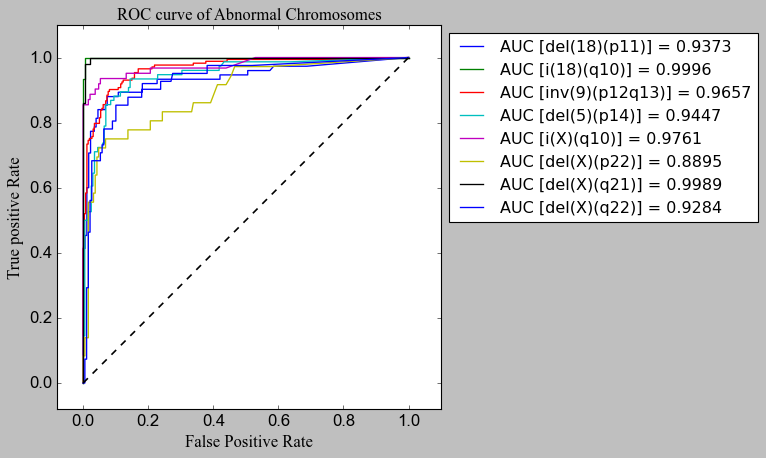

In [30]:
fig = plt.figure()
plt.style.use('classic')

ax = fig.add_subplot(111)

for item in label:
    plt.plot(fpr_all[item], tpr_all[item], linewidth=1.2, 
             label='AUC [' + label_convert[item] + '] = ' + str(round(auc_value[item],4)))
    
    ax.legend(bbox_to_anchor=(1,1),  loc="upper left")

plt.plot(x, y, '--', color='black', linewidth=1.5)

plt.title('ROC curve of Abnormal Chromosomes', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=15, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=15, fontname = 'Times New Roman')

ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)

plt.xticks(fontsize=15, fontname = 'Arial')
plt.yticks(fontsize=15, fontname = 'Arial')

plt.savefig('ROC_Curve_Combination.png', dpi=400, bbox_inches='tight')
plt.show()

#### 3.10.4.1 AUC Value

In [ ]:
auc_value = {}
for item in label:
    auc_value[item] = auc(fpr_all[item], tpr_all[item])
    print('AUC is ', auc_value[item])

# Results

In [ ]:
print('Test Accuracy: %.3f' % acc)

In [ ]:
print(performanceReport)

In [ ]:
type(performanceReport)

In [ ]:
print('AUC is ', auc_value)

## Export to a text file

In [ ]:
file_report = open('ResultsCombination.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.write('Recall of Confusion Matrix: \n%s.\n\n' % confusion_r)
file_report.write('Precision of Confusion Matrix: \n%s.\n\n' % confusion_p)
file_report.close()